In [1]:
from pynq import Overlay
from pynq.lib import AxiGPIO
overlay=Overlay('ecg17.bit')

In [15]:
import matplotlib.pyplot as plt 
import numpy as np
from collections import deque
from IPython import display
import sys
sys.path.append('/home/xilinx/.local/lib/python3.6/site-packages')
sys.path=list(set(sys.path))
sys.path
from ecgdetectors import Detectors
from hrv import HRV #heartrate variability analysis
#overlay.ip_dict

In [19]:
handle=AxiGPIO(overlay.ip_dict['axi_gpio_0'])
data_points=deque(maxlen=480)
data=handle.channel1
hrv_analyzer = HRV(128)
detector1=Detectors(128)

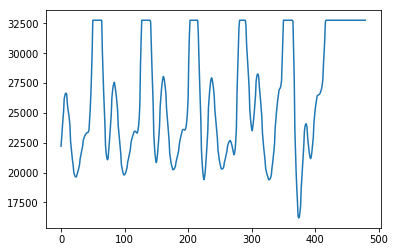

359


KeyboardInterrupt: 

In [20]:
import time
i=0
def plottt():
    display.clear_output(wait=True)
    plt.plot(data_points)
    plt.show()
while 1:
    #mask=0xffff
    #read_en.write(0,mask)
    i=i+1
    data_points.append(data.read())
    time.sleep(0.01)
    #print(data_points)
    if(i==480):
        i=0
        plottt()
        print(hrv_analyzer.NN20(data_points))

In [ ]:

mask=0xffff
read_en.write(1,mask)
print(data.read())
read_en.write(0,mask)